##**6**. El dataset elegido en PYTHON, realice tres tecnicas de preprocesamiento. Explique la razón de aplicar estas técnicas

**PROCESAMIENTO - NORMALIZACION**

Se aplica este algoritmo de escalado para evitar que una caracteristica particular domine el analisis (por ejemplo la velocidad de la rotacion en los 3 ejes son valores altos en comparacion a la velocidad de aceleracion en los 3 ejes, siendo la dimension la velocidad de la rotacion en particular quien domine el analisis de prediccion, ejemplo que se muestra en el grafico).

La normalización es una técnica de escalado que transforma los datos para que estén en una escala uniforme.


In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')
#cambiar el directorio de trabajo actual
os.chdir('/content/drive/MyDrive/data')
!pwd

Mounted at /content/drive
/content/drive/MyDrive/data


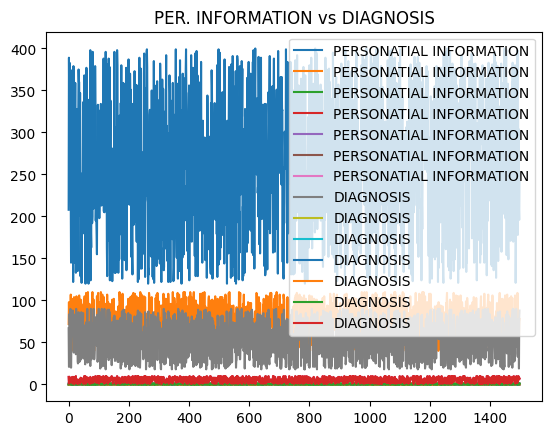

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
datos=pd.read_csv("heart_attack_dataset.csv")
df=datos[['Age','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Stress Level']]
plt.plot(df.drop(['Age','Obesity','Family History','Medication Use'],axis=1),label="PERSONATIAL INFORMATION")
plt.plot(df.drop(['Cholesterol','Heart Rate','Diabetes','Medication Use'],axis=1),label="DIAGNOSIS")
plt.title("PER. INFORMATION vs DIAGNOSIS")
plt.legend()
plt.show()

[[0.29097725 0.90333236 0.31269197 ... 0.         0.         0.0390865 ]
 [0.05227634 0.96835703 0.24395627 ... 0.00248935 0.         0.00248935]
 [0.06312144 0.97387359 0.21641635 ... 0.         0.00300578 0.02705204]
 ...
 [0.08782941 0.96150089 0.25886562 ... 0.         0.0046226  0.0277356 ]
 [0.35596713 0.87211948 0.33371919 ... 0.         0.00444959 0.03559671]
 [0.32804777 0.89840356 0.29076962 ... 0.         0.         0.02609471]]


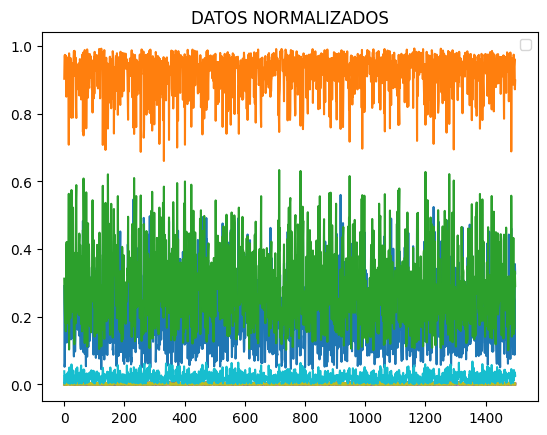

In [6]:

from sklearn import preprocessing
df=datos[['Age','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Stress Level']]
tecnica=preprocessing.Normalizer()
datos_normalizados=tecnica.fit_transform(df.drop('Previous Heart Problems',axis=1))
print(datos_normalizados)
plt.plot(datos_normalizados)
plt.title("DATOS NORMALIZADOS")
plt.legend()
plt.show()

**PREPOCESAMIENTO - DETECCION DE OUTLIER**

Outlier o valor atípico es aquel que se “escapa” del rango normal de valores de la variable que se está estudiando en este caso identificacion de actividad humana mediante sensores de un telefono movel. Generalmente se producen por errores en las mediciones o describen fenómenos que no representan el funcionamiento común de lo que se está, cual consideramos que es el caso

quartil_1 = 57.0
quartil_2= 92.0
rango_interq = 35.0
mediana = 74.0
lim_sup_datosNoAtipicos = 4.5
lim_inf_datosNoAtipicos = 109.5
valor_min = 40
valor_max = 110
IDENTIFICACION DE VALORES ATIPICOS
valor_min = 40 va por debajo lim_inf_datosNoAtipicos (<) 109.5 Por lo tanto es un valor ATIPICO
valor_max = 110 va por debajo lim_sup_datosNoAtipicos (>) 4.5 Por lo tanto es un valor ATIPICO


<function matplotlib.pyplot.show(close=None, block=None)>

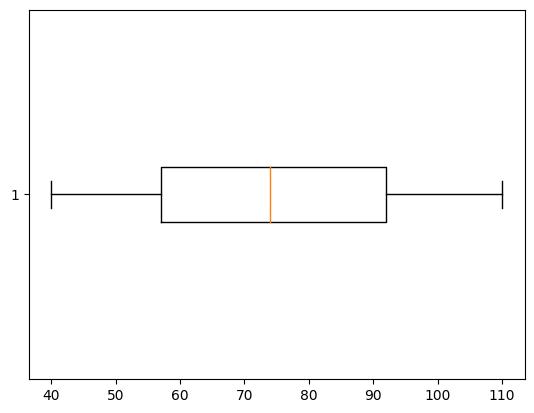

In [10]:
#comprobamos la existencia de los outlier analiticamente en nuestra dataset,
#mediante el MÉTODO IQR(son atipicos si todo valor Q1+1.5RIQ, donde RIQ es el rango intercuartiles ")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
datos=pd.read_csv("heart_attack_dataset.csv")
df=datos[['Age','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Stress Level']]
#calculo para la identificacion de valores atipicos
def identificar_par(x):
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    RIQ=Q3-Q1
    mediana=x.median()
        #limites de los valores no atipicos Q1-1.5*RIQ y Q1+1.5*RIQ
    BI_calculado=Q1-1.5*RIQ
    BS_calculado=Q1+1.5*RIQ
      #posibles valores atipicos
    valor_min=x.min()
    valor_max=x.max()
    #RESULTADOS
    return([Q1,Q3,RIQ,mediana,BI_calculado,BS_calculado,valor_min,valor_max])

parametros=identificar_par(df['Heart Rate'])
print("quartil_1 =",parametros[0])
print("quartil_2=",parametros[1])
print("rango_interq =",parametros[2])
print("mediana =",parametros[3])
print("lim_sup_datosNoAtipicos =",parametros[4])
print("lim_inf_datosNoAtipicos =",parametros[5])
print("valor_min =",parametros[6])
print("valor_max =",parametros[7])
print("IDENTIFICACION DE VALORES ATIPICOS")
print("valor_min =",parametros[6], "va por debajo lim_inf_datosNoAtipicos (<)", parametros[5], "Por lo tanto es un valor ATIPICO")
print("valor_max =",parametros[7], "va por debajo lim_sup_datosNoAtipicos (>)", parametros[4], "Por lo tanto es un valor ATIPICO")
#GRAFICAMENTE tambien se muestra la existencia de valores atipicos
plt.boxplot((df['Heart Rate'],), vert=False)
plt.show

In [11]:

#Identificamos todo el conjunto de outlers meniante el medodo conocido como Local Outlier Factor (LOF).
# Este es un algoritmo no-supervisado que calcula la densidad local de un punto dado con respecto a sus vecinos más cercanos.
# Aquellos puntos que tienen menos densidad que sus vecinos son considerados outliers.
from sklearn.neighbors import LocalOutlierFactor
#contamination (la variable contamination) es el porcentaje de datos que puede que sean outliers
#n_neighbors es el numero de vecinos sobre el cual calcula la densidad
x= df.drop('Heart Rate', axis=1)
tecnica = LocalOutlierFactor(n_neighbors=20,contamination=0.1)
outlier_lof=tecnica.fit_predict(x)
outliers = x[outlier_lof == -1]
print("N'umero total de filas donde se detecto valores atipicos es: ",(outlier_lof==-1).sum())
print("filas donde a detectado outlier son:")
outliers

N'umero total de filas donde se detecto valores atipicos es:  150
filas donde a detectado outlier son:


,Age,Cholesterol,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Medication Use,Stress Level
1,21,389,1,1,1,1,1,1,0,1
2,21,324,1,0,0,0,0,1,1,9
6,90,358,0,0,1,0,1,0,0,7
25,90,159,0,0,1,0,1,0,1,2
48,85,336,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1448,21,400,1,1,0,0,0,0,1,9
1452,50,334,1,0,1,0,0,1,0,9
1462,21,225,1,1,0,1,0,0,1,10
1474,20,308,1,0,1,1,1,1,1,9
